# Example analysis

This notebook provides a generic example for some analysis that you might want to conduct with the data provided through this AFQ-Browser instance. Note that this is just an example, and not may be a good approach to the data in this particular instance of the AFQ-Browser, and this data-set. Ultimately, the limits of the analysis you could do are the limits of your imagination.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
subjects = pd.read_csv('./data/subjects.csv')

In [4]:
nodes = pd.read_csv('./data/nodes.csv')

### Merging nodes and subjects

The data from nodes (referring to diffusion statistics along the length of the tracts) can be merged together with the data about subjects into one table:

In [5]:
merged = pd.merge(nodes, subjects, on="subjectID")

In [6]:
merged.head()

,subjectID,tractID,nodeID,rd,md,cl,torsion,curvature,fa,ad,volume,Unnamed: 0,patient,score,session
0,patient_01,Left Thalamic Radiation,0,0.613340,0.851832,0.257362,-0.065856,0.137844,0.452992,1.328816,70.0,0,1,0.194764,1
1,patient_01,Left Thalamic Radiation,1,0.611204,0.848955,0.256652,-0.087893,0.153220,0.453549,1.324456,60.0,0,1,0.194764,1
2,patient_01,Left Thalamic Radiation,2,0.608178,0.843154,0.254787,-0.244466,0.092622,0.452349,1.313105,76.0,0,1,0.194764,1
3,patient_01,Left Thalamic Radiation,3,0.604815,0.837168,0.253062,-0.533194,0.027443,0.451471,1.301873,55.0,0,1,0.194764,1
4,patient_01,Left Thalamic Radiation,4,0.601006,0.831444,0.251759,0.272117,0.047876,0.451726,1.292319,71.0,0,1,0.194764,1


### Visualizing the data 

You can use [Matplotlib](http://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/)  to visualize the data:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

We focus on the calculated diffusion statistics that are included in the `nodes` table:

In [8]:
stats = nodes.columns.drop(["subjectID", "tractID", "nodeID"])

And specifically on the very first one

In [9]:
print(stats[0])

rd


In [10]:
stat = merged[["nodeID", "subjectID", "tractID", stats[0]]]

Select a single tract:

In [11]:
tract_stat = stat[stat["tractID"] == stat["tractID"].values[0]]

In [12]:
tract_stat.head()

,nodeID,subjectID,tractID,rd
0,0,patient_01,Left Thalamic Radiation,0.613340
1,1,patient_01,Left Thalamic Radiation,0.611204
2,2,patient_01,Left Thalamic Radiation,0.608178
3,3,patient_01,Left Thalamic Radiation,0.604815
4,4,patient_01,Left Thalamic Radiation,0.601006


In [13]:
tract_p = tract_stat.pivot(index='nodeID', columns='subjectID', values=stats[0]) 

In [14]:
import numpy as np

/Users/arokem/anaconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/Users/arokem/anaconda3/lib/python3.5/site-packages/seaborn/algorithms.py:76: RuntimeWarning: Mean of empty slice
  boot_dist.append(func(*sample, **func_kwargs))


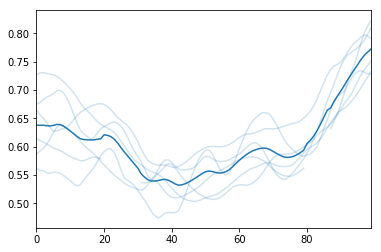

In [15]:
sns.tsplot(tract_p.values.T, err_style="unit_traces", estimator=np.nanmean)

### Analyzing data 

As an example of one approach to AFQ data, we include here an example of how you might use [Scikit Learn's implementation of the K-means algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster the subjects in these data into two clusters, based on this statistic/tract combination.

In [16]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

We create a pipeline that imputes nan values (that sometimes occur in tract profiles), and clusters the results into two clusters:

In [17]:
estimator = Pipeline([("impute", Imputer()), ("cluster", KMeans(n_clusters=2))])

We compute the clusters and transform the data into cluster distance space

In [18]:
clusters = estimator.fit(tract_p.values.T).steps[1][1]

In [19]:
labels = clusters.labels_

In [20]:
x, y = estimator.fit_transform(tract_p.values.T).T

We plot the results in the latent cluster space

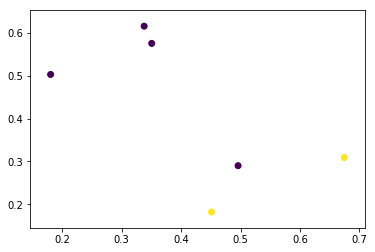

In [21]:
plt.scatter(x, y, c=labels.astype(np.float))